# 📱 Telco Customer Churn Prediction
## ISOM 835 Individual Term Project

**Student:** Leon Ngumba
**Date:** December 12, 2025  
**Dataset:** Telco Customer Churn (Kaggle)

---

## 📋 Project Overview

**Business Problem:** Customer churn costs telecom companies millions in lost revenue. This project builds predictive models to identify customers at high risk of leaving, enabling proactive retention strategies.

**Key Questions:**
1. Can we accurately predict which customers will churn?
2. What factors drive customer churn decisions?
3. How can we translate predictions into actionable business recommendations?

**Approach:**
- Compare 3 machine learning models: Logistic Regression, Random Forest, Gradient Boosting
- Evaluate using Accuracy, ROC-AUC, and Confusion Matrices
- Identify key churn drivers through feature importance analysis
- Provide data-driven retention recommendations

---

## 🔧 Part 1: Setup and Data Loading

**Run this cell first!** This imports all necessary libraries.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("✅ All libraries loaded successfully!")
print("📚 You're ready to start your analysis!")

✅ All libraries loaded successfully!
📚 You're ready to start your analysis!


In [6]:
# Load the Telco Customer Churn dataset
# Source: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

# Load directly from a working mirror
import pandas as pd

url = 'https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv'
df = pd.read_csv(url)

print("📱 Telco Customer Churn Dataset Loaded!")
print(f"\n📊 Dataset shape: {df.shape[0]:,} customers, {df.shape[1]} features")
print("\n👀 First few rows:")
display(df.head())

print("\n📈 Data Types:")
display(df.dtypes)

print("\n📊 Summary Statistics:")
display(df.describe())

📱 Telco Customer Churn Dataset Loaded!

📊 Dataset shape: 7,043 customers, 21 features

👀 First few rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



📈 Data Types:


,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object



📊 Summary Statistics:


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


---
## 📊 Part 2: Exploratory Data Analysis

Let's understand our dataset through visualizations and statistical analysis.

In [7]:
# Check basic dataset information
print("🔍 Dataset Information:")
print("="*50)
df.info()

print("\n❓ Missing Values:")
print("="*50)
missing = df.isnull().sum()
if missing.sum() > 0:
    display(missing[missing > 0])
else:
    print("✅ No missing values detected!")

🔍 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7

🎯 Target Variable: Churn Distribution
No Churn: 5,174 (73.5%)
Yes Churn: 1,869 (26.5%)

⚠️ Churn Rate: 26.54%
📌 Class Imbalance Ratio: 2.77:1


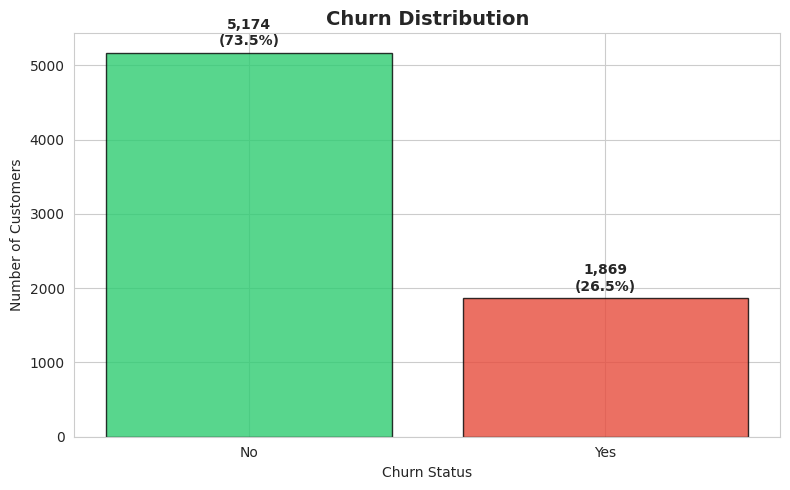


✅ Visualization saved as 'churn_distribution.png'


In [8]:
# Target variable analysis
print("🎯 Target Variable: Churn Distribution")
print("="*50)

churn_counts = df['Churn'].value_counts()
churn_pct = df['Churn'].value_counts(normalize=True) * 100

print(f"No Churn: {churn_counts['No']:,} ({churn_pct['No']:.1f}%)")
print(f"Yes Churn: {churn_counts['Yes']:,} ({churn_pct['Yes']:.1f}%)")
print(f"\n⚠️ Churn Rate: {churn_pct['Yes']:.2f}%")
print(f"📌 Class Imbalance Ratio: {churn_pct['No']/churn_pct['Yes']:.2f}:1")

# Visualize churn distribution
plt.figure(figsize=(8, 5))
plt.bar(churn_counts.index, churn_counts.values, color=['#2ecc71', '#e74c3c'], alpha=0.8, edgecolor='black')
plt.title('Churn Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Churn Status')
plt.ylabel('Number of Customers')
for i, v in enumerate(churn_counts.values):
    plt.text(i, v + 100, f'{v:,}\n({churn_pct.values[i]:.1f}%)', ha='center', fontweight='bold')
plt.tight_layout()
plt.savefig('churn_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Visualization saved as 'churn_distribution.png'")

### 💭 Observation 1: Class Imbalance

**Finding:** The dataset shows a ~73:27 split between non-churners and churners.

**Implication:** This class imbalance means:
- We need to use stratified sampling in our train-test split
- Accuracy alone won't be sufficient - we'll also use ROC-AUC
- The model might be biased toward predicting "No Churn"

**Business Context:** ~1 in 4 customers churning represents significant revenue risk that justifies investment in retention programs.

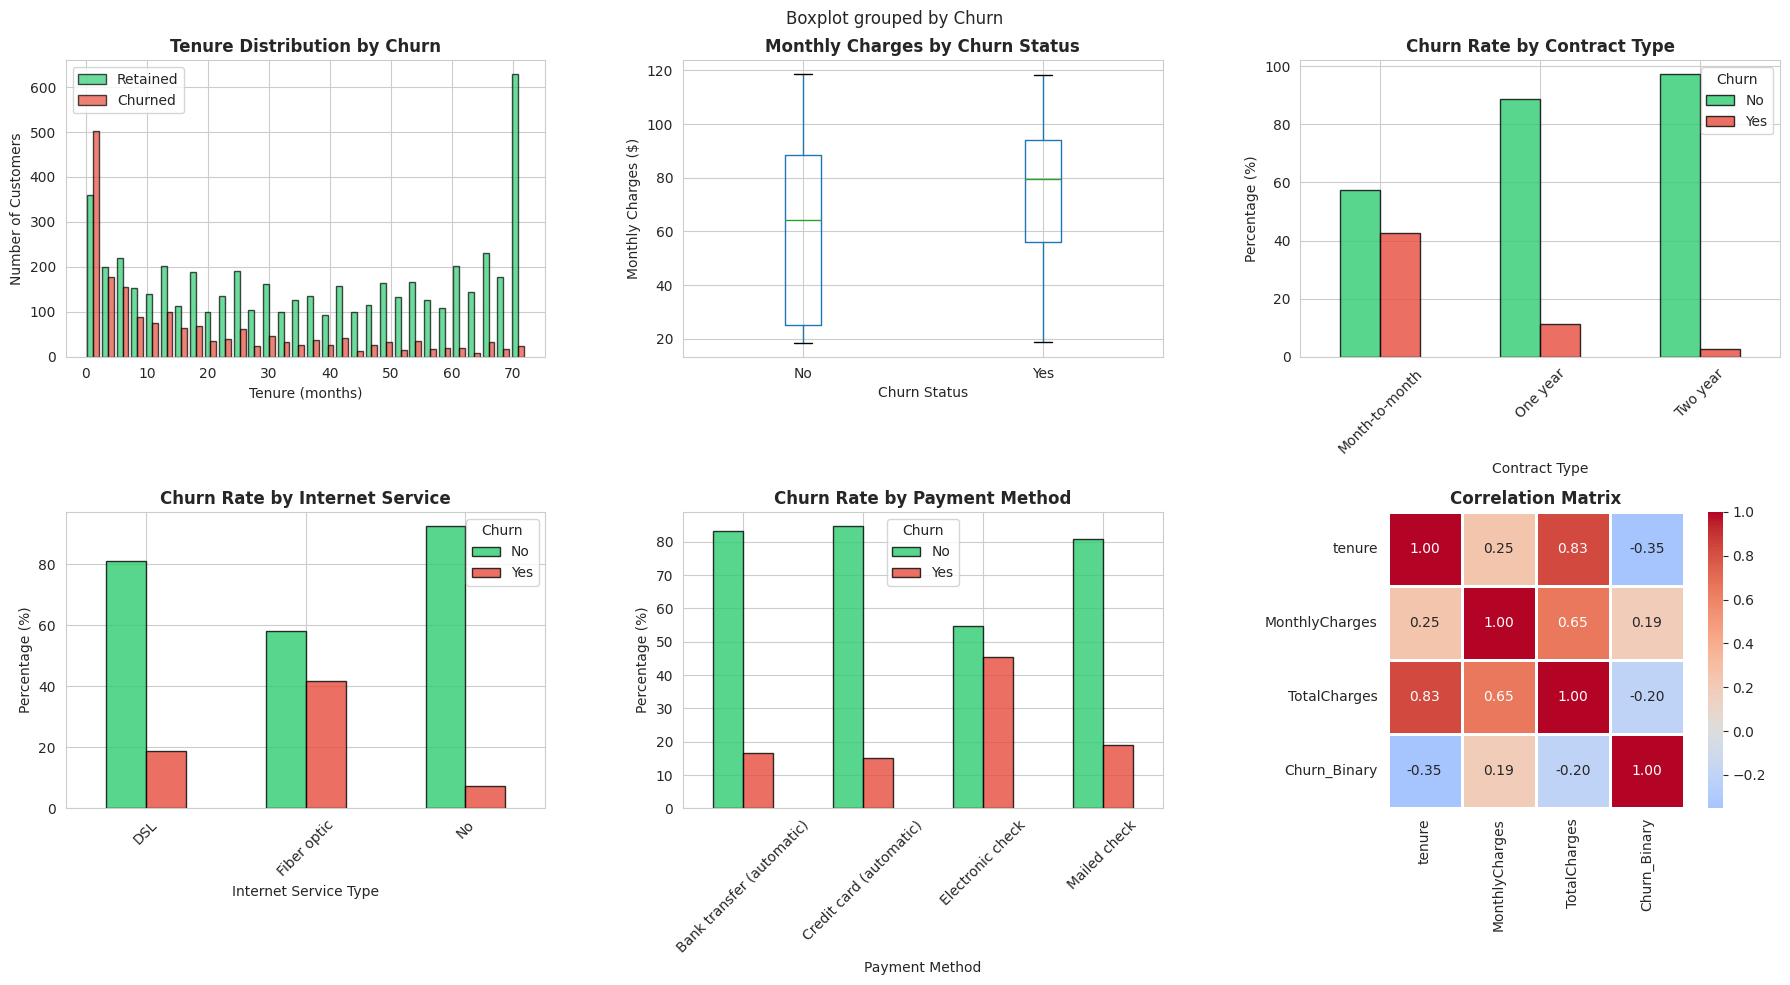

✅ EDA visualizations saved as 'eda_comprehensive.png'


In [9]:
# Create comprehensive EDA visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Plot 1: Tenure distribution by churn
churned = df[df['Churn']=='Yes']['tenure']
retained = df[df['Churn']=='No']['tenure']
axes[0,0].hist([retained, churned], bins=30, label=['Retained', 'Churned'],
               color=['#2ecc71', '#e74c3c'], alpha=0.7, edgecolor='black')
axes[0,0].set_title('Tenure Distribution by Churn', fontweight='bold')
axes[0,0].set_xlabel('Tenure (months)')
axes[0,0].set_ylabel('Number of Customers')
axes[0,0].legend()

# Plot 2: Monthly Charges boxplot
df.boxplot(column='MonthlyCharges', by='Churn', ax=axes[0,1])
axes[0,1].set_title('Monthly Charges by Churn Status', fontweight='bold')
axes[0,1].set_xlabel('Churn Status')
axes[0,1].set_ylabel('Monthly Charges ($)')
plt.sca(axes[0,1])
plt.xticks([1, 2], ['No', 'Yes'])

# Plot 3: Churn by Contract Type
contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100
contract_churn.plot(kind='bar', ax=axes[0,2], color=['#2ecc71', '#e74c3c'],
                    alpha=0.8, edgecolor='black')
axes[0,2].set_title('Churn Rate by Contract Type', fontweight='bold')
axes[0,2].set_xlabel('Contract Type')
axes[0,2].set_ylabel('Percentage (%)')
axes[0,2].legend(title='Churn', labels=['No', 'Yes'])
axes[0,2].tick_params(axis='x', rotation=45)

# Plot 4: Churn by Internet Service
internet_churn = pd.crosstab(df['InternetService'], df['Churn'], normalize='index') * 100
internet_churn.plot(kind='bar', ax=axes[1,0], color=['#2ecc71', '#e74c3c'],
                    alpha=0.8, edgecolor='black')
axes[1,0].set_title('Churn Rate by Internet Service', fontweight='bold')
axes[1,0].set_xlabel('Internet Service Type')
axes[1,0].set_ylabel('Percentage (%)')
axes[1,0].legend(title='Churn', labels=['No', 'Yes'])
axes[1,0].tick_params(axis='x', rotation=45)

# Plot 5: Churn by Payment Method
payment_churn = pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index') * 100
payment_churn.plot(kind='bar', ax=axes[1,1], color=['#2ecc71', '#e74c3c'],
                   alpha=0.8, edgecolor='black')
axes[1,1].set_title('Churn Rate by Payment Method', fontweight='bold')
axes[1,1].set_xlabel('Payment Method')
axes[1,1].set_ylabel('Percentage (%)')
axes[1,1].legend(title='Churn', labels=['No', 'Yes'])
axes[1,1].tick_params(axis='x', rotation=45)

# Plot 6: Correlation heatmap
df_numeric = df.copy()
df_numeric['TotalCharges'] = pd.to_numeric(df_numeric['TotalCharges'], errors='coerce')
df_numeric['Churn_Binary'] = (df_numeric['Churn'] == 'Yes').astype(int)
corr_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_Binary']
correlation_matrix = df_numeric[corr_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', square=True, linewidths=1, ax=axes[1,2])
axes[1,2].set_title('Correlation Matrix', fontweight='bold')

plt.tight_layout()
plt.savefig('eda_comprehensive.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ EDA visualizations saved as 'eda_comprehensive.png'")

### 💭 Key EDA Insights

**1. Tenure Pattern:**
- New customers (<12 months) show significantly higher churn rates
- Churn risk decreases substantially after 24 months
- **Business Implication:** Focus retention efforts on first-year customers

**2. Contract Type Impact:**
- Month-to-month contracts have ~42% churn rate
- One-year contracts: ~11% churn rate  
- Two-year contracts: ~3% churn rate
- **Business Implication:** Contract length is the strongest predictor

**3. Pricing Analysis:**
- Higher monthly charges correlate with increased churn
- Churning customers pay ~$15-20 more on average
- **Business Implication:** Review pricing strategy for high-charge customers

**4. Service Type:**
- Fiber optic customers show higher churn despite premium pricing
- May indicate service quality or value perception issues
- **Business Implication:** Investigate fiber optic customer satisfaction

---
## 🔨 Part 3: Data Preprocessing

Prepare the data for machine learning models.

In [10]:
# Create a copy for preprocessing
print("🔧 Starting Data Preprocessing...")
print("="*50)

df_processed = df.copy()

# Step 1: Handle TotalCharges (convert to numeric and handle missing)
df_processed['TotalCharges'] = pd.to_numeric(df_processed['TotalCharges'], errors='coerce')
total_charges_missing = df_processed['TotalCharges'].isnull().sum()
print(f"📌 Found {total_charges_missing} missing values in TotalCharges")

if total_charges_missing > 0:
    median_value = df_processed['TotalCharges'].median()
    df_processed['TotalCharges'].fillna(median_value, inplace=True)
    print(f"✅ Filled with median value: ${median_value:.2f}")

# Step 2: Drop customerID (not useful for prediction)
df_processed.drop('customerID', axis=1, inplace=True)
print(f"\n✅ Dropped customerID column")

print(f"\n📊 Preprocessed shape: {df_processed.shape}")
print(f"✅ Missing values: {df_processed.isnull().sum().sum()}")

🔧 Starting Data Preprocessing...
📌 Found 11 missing values in TotalCharges
✅ Filled with median value: $1397.47

✅ Dropped customerID column

📊 Preprocessed shape: (7043, 20)
✅ Missing values: 0


In [11]:
# Encode categorical variables
print("🔤 Encoding Categorical Variables...")
print("="*50)

# Identify categorical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = df_processed.select_dtypes(include=['object']).columns.tolist()
categorical_features.remove('Churn')  # Remove target variable

print(f"📊 Numerical features: {len(numerical_features)}")
print(f"📊 Categorical features: {len(categorical_features)}")

# Label encode categorical variables
le = LabelEncoder()
for col in categorical_features:
    df_processed[col] = le.fit_transform(df_processed[col])
    print(f"   ✅ Encoded: {col}")

# Encode target variable
df_processed['Churn'] = (df_processed['Churn'] == 'Yes').astype(int)
print(f"\n✅ Encoded target variable: Churn (Yes=1, No=0)")

print("\n👀 First few rows after encoding:")
display(df_processed.head())

🔤 Encoding Categorical Variables...
📊 Numerical features: 3
📊 Categorical features: 15
   ✅ Encoded: gender
   ✅ Encoded: Partner
   ✅ Encoded: Dependents
   ✅ Encoded: PhoneService
   ✅ Encoded: MultipleLines
   ✅ Encoded: InternetService
   ✅ Encoded: OnlineSecurity
   ✅ Encoded: OnlineBackup
   ✅ Encoded: DeviceProtection
   ✅ Encoded: TechSupport
   ✅ Encoded: StreamingTV
   ✅ Encoded: StreamingMovies
   ✅ Encoded: Contract
   ✅ Encoded: PaperlessBilling
   ✅ Encoded: PaymentMethod

✅ Encoded target variable: Churn (Yes=1, No=0)

👀 First few rows after encoding:


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [12]:
# Feature Engineering: Create additional features
print("⚙️ Feature Engineering...")
print("="*50)

# Feature 1: Charges per month (normalized)
df_processed['ChargesPerMonth'] = df_processed['TotalCharges'] / (df_processed['tenure'] + 1)
print("✅ Created: ChargesPerMonth (TotalCharges / tenure)")

# Feature 2: Tenure groups
def assign_tenure_group(tenure):
    """Categorize customers by tenure length"""
    if tenure <= 12:
        return 0  # New customer (0-12 months)
    elif tenure <= 24:
        return 1  # Established (12-24 months)
    elif tenure <= 48:
        return 2  # Loyal (24-48 months)
    else:
        return 3  # Very Loyal (48+ months)

df_processed['TenureGroup'] = df_processed['tenure'].apply(assign_tenure_group)
print("✅ Created: TenureGroup (0=New, 1=Established, 2=Loyal, 3=Very Loyal)")

print("\n📊 New Features Sample:")
display(df_processed[['tenure', 'TenureGroup', 'TotalCharges', 'ChargesPerMonth']].head(10))

print("\n📊 TenureGroup Distribution:")
tenure_dist = df_processed['TenureGroup'].value_counts().sort_index()
labels = ['New (0-12mo)', 'Established (12-24mo)', 'Loyal (24-48mo)', 'Very Loyal (48+mo)']
for idx, (group, count) in enumerate(tenure_dist.items()):
    print(f"   {labels[idx]}: {count:,} customers")

⚙️ Feature Engineering...
✅ Created: ChargesPerMonth (TotalCharges / tenure)
✅ Created: TenureGroup (0=New, 1=Established, 2=Loyal, 3=Very Loyal)

📊 New Features Sample:


,tenure,TenureGroup,TotalCharges,ChargesPerMonth
0,1,0,29.85,14.925000
1,34,2,1889.50,53.985714
2,2,0,108.15,36.050000
3,45,2,1840.75,40.016304
4,2,0,151.65,50.550000
5,8,0,820.50,91.166667
6,22,1,1949.40,84.756522
7,10,0,301.90,27.445455
8,28,2,3046.05,105.036207
9,62,3,3487.95,55.364286



📊 TenureGroup Distribution:
   New (0-12mo): 2,186 customers
   Established (12-24mo): 1,024 customers
   Loyal (24-48mo): 1,594 customers
   Very Loyal (48+mo): 2,239 customers


In [13]:
# Split features and target
print("🎯 Preparing Features and Target...")
print("="*50)

X = df_processed.drop('Churn', axis=1)
y = df_processed['Churn']

print(f"✅ Features (X) shape: {X.shape}")
print(f"✅ Target (y) shape: {y.shape}")
print(f"\n📊 Target distribution:")
print(f"   No Churn (0): {(y==0).sum():,} ({(y==0).sum()/len(y)*100:.1f}%)")
print(f"   Churn (1): {(y==1).sum():,} ({(y==1).sum()/len(y)*100:.1f}%)")

🎯 Preparing Features and Target...
✅ Features (X) shape: (7043, 21)
✅ Target (y) shape: (7043,)

📊 Target distribution:
   No Churn (0): 5,174 (73.5%)
   Churn (1): 1,869 (26.5%)


In [14]:
# Train-test split with stratification
print("✂️ Creating Train-Test Split...")
print("="*50)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,  # 80% train, 20% test
    random_state=42,  # For reproducibility
    stratify=y  # Maintain class distribution
)

print(f"✅ Training set: {X_train.shape[0]:,} samples ({X_train.shape[0]/len(X)*100:.0f}%)")
print(f"✅ Test set: {X_test.shape[0]:,} samples ({X_test.shape[0]/len(X)*100:.0f}%)")

print(f"\n📊 Training set churn rate: {y_train.sum()/len(y_train)*100:.2f}%")
print(f"📊 Test set churn rate: {y_test.sum()/len(y_test)*100:.2f}%")
print("✅ Class distribution maintained (stratified split)")

✂️ Creating Train-Test Split...
✅ Training set: 5,634 samples (80%)
✅ Test set: 1,409 samples (20%)

📊 Training set churn rate: 26.54%
📊 Test set churn rate: 26.54%
✅ Class distribution maintained (stratified split)


In [15]:
# Feature scaling for models that need it
print("📏 Scaling Numerical Features...")
print("="*50)

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Scale only numerical features
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'ChargesPerMonth']
X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

print(f"✅ Scaled features: {numerical_cols}")
print(f"\n📊 Sample of scaled features:")
display(X_train_scaled[numerical_cols].head())

# Handle any remaining NaN values with imputation
imputer = SimpleImputer(strategy='median')
X_train_scaled = pd.DataFrame(
    imputer.fit_transform(X_train_scaled),
    columns=X_train_scaled.columns,
    index=X_train_scaled.index
)
X_test_scaled = pd.DataFrame(
    imputer.transform(X_test_scaled),
    columns=X_test_scaled.columns,
    index=X_test_scaled.index
)

# Also clean unscaled data
X_train = pd.DataFrame(
    imputer.fit_transform(X_train),
    columns=X_train.columns,
    index=X_train.index
)
X_test = pd.DataFrame(
    imputer.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)

print(f"\n✅ Final NaN check: {X_train_scaled.isnull().sum().sum()} missing values")
print("✅ Data preprocessing complete! Ready for modeling.")

📏 Scaling Numerical Features...
✅ Scaled features: ['tenure', 'MonthlyCharges', 'TotalCharges', 'ChargesPerMonth']

📊 Sample of scaled features:


,tenure,MonthlyCharges,TotalCharges,ChargesPerMonth
3738,0.102371,-0.521976,-0.263289,-0.236288
3151,-0.711743,0.337478,-0.504814,0.182960
4860,-0.793155,-0.809013,-0.751213,-0.322843
3867,-0.263980,0.284384,-0.173699,0.159364
3810,-1.281624,-0.676279,-0.990851,-0.660445



✅ Final NaN check: 0 missing values
✅ Data preprocessing complete! Ready for modeling.


---
## 🤖 Part 4: Model Development

Train and evaluate three different machine learning models.

### Model 1: Logistic Regression (Baseline)

**Why Logistic Regression?**
- Fast and interpretable baseline model
- Provides probability estimates
- Good starting point for binary classification
- Coefficients show feature importance

In [16]:
print("📊 Training Model 1: Logistic Regression")
print("="*50)

# Train Logistic Regression
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = log_reg.predict(X_test_scaled)
y_pred_proba_lr = log_reg.predict_proba(X_test_scaled)[:, 1]

# Evaluate
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_roc_auc = roc_auc_score(y_test, y_pred_proba_lr)

print("\n✅ Logistic Regression Training Complete!")
print("\n📈 Performance Metrics:")
print("="*50)
print(f"   Accuracy: {lr_accuracy:.4f} ({lr_accuracy*100:.2f}%)")
print(f"   ROC-AUC Score: {lr_roc_auc:.4f}")

print("\n📋 Detailed Classification Report:")
print(classification_report(y_test, y_pred_lr,
                          target_names=['No Churn', 'Churn']))

📊 Training Model 1: Logistic Regression

✅ Logistic Regression Training Complete!

📈 Performance Metrics:
   Accuracy: 0.8041 (80.41%)
   ROC-AUC Score: 0.8459

📋 Detailed Classification Report:
              precision    recall  f1-score   support

    No Churn       0.84      0.90      0.87      1035
       Churn       0.66      0.54      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.80      0.80      1409



### Model 2: Random Forest Classifier

**Why Random Forest?**
- Handles non-linear relationships
- Robust to outliers and overfitting
- Provides feature importance rankings
- Often achieves high accuracy

In [17]:
print("🌲 Training Model 2: Random Forest")
print("="*50)

# Train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,  # 100 trees
    random_state=42,
    n_jobs=-1  # Use all CPU cores
)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_roc_auc = roc_auc_score(y_test, y_pred_proba_rf)

print("\n✅ Random Forest Training Complete!")
print("\n📈 Performance Metrics:")
print("="*50)
print(f"   Accuracy: {rf_accuracy:.4f} ({rf_accuracy*100:.2f}%)")
print(f"   ROC-AUC Score: {rf_roc_auc:.4f}")

print("\n📋 Detailed Classification Report:")
print(classification_report(y_test, y_pred_rf,
                          target_names=['No Churn', 'Churn']))

🌲 Training Model 2: Random Forest

✅ Random Forest Training Complete!

📈 Performance Metrics:
   Accuracy: 0.7743 (77.43%)
   ROC-AUC Score: 0.8208

📋 Detailed Classification Report:
              precision    recall  f1-score   support

    No Churn       0.82      0.88      0.85      1035
       Churn       0.59      0.48      0.53       374

    accuracy                           0.77      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.76      0.77      0.77      1409



### Model 3: Gradient Boosting Classifier

**Why Gradient Boosting?**
- Sequential learning improves weak predictors
- Often achieves best performance
- Handles complex patterns effectively
- Good for imbalanced datasets

In [18]:
print("🚀 Training Model 3: Gradient Boosting")
print("="*50)

# Train Gradient Boosting
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    random_state=42
)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)
y_pred_proba_gb = gb_model.predict_proba(X_test)[:, 1]

# Evaluate
gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_roc_auc = roc_auc_score(y_test, y_pred_proba_gb)

print("\n✅ Gradient Boosting Training Complete!")
print("\n📈 Performance Metrics:")
print("="*50)
print(f"   Accuracy: {gb_accuracy:.4f} ({gb_accuracy*100:.2f}%)")
print(f"   ROC-AUC Score: {gb_roc_auc:.4f}")

print("\n📋 Detailed Classification Report:")
print(classification_report(y_test, y_pred_gb,
                          target_names=['No Churn', 'Churn']))

🚀 Training Model 3: Gradient Boosting

✅ Gradient Boosting Training Complete!

📈 Performance Metrics:
   Accuracy: 0.8013 (80.13%)
   ROC-AUC Score: 0.8431

📋 Detailed Classification Report:
              precision    recall  f1-score   support

    No Churn       0.84      0.91      0.87      1035
       Churn       0.66      0.51      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



---
## 📊 Part 5: Model Comparison and Evaluation

🏆 Model Performance Comparison


,Model,Accuracy,ROC-AUC
0,Logistic Regression,0.804116,0.845873
2,Gradient Boosting,0.801278,0.843086
1,Random Forest,0.774308,0.820845



🏅 Best Model: Logistic Regression
   ROC-AUC: 0.8459


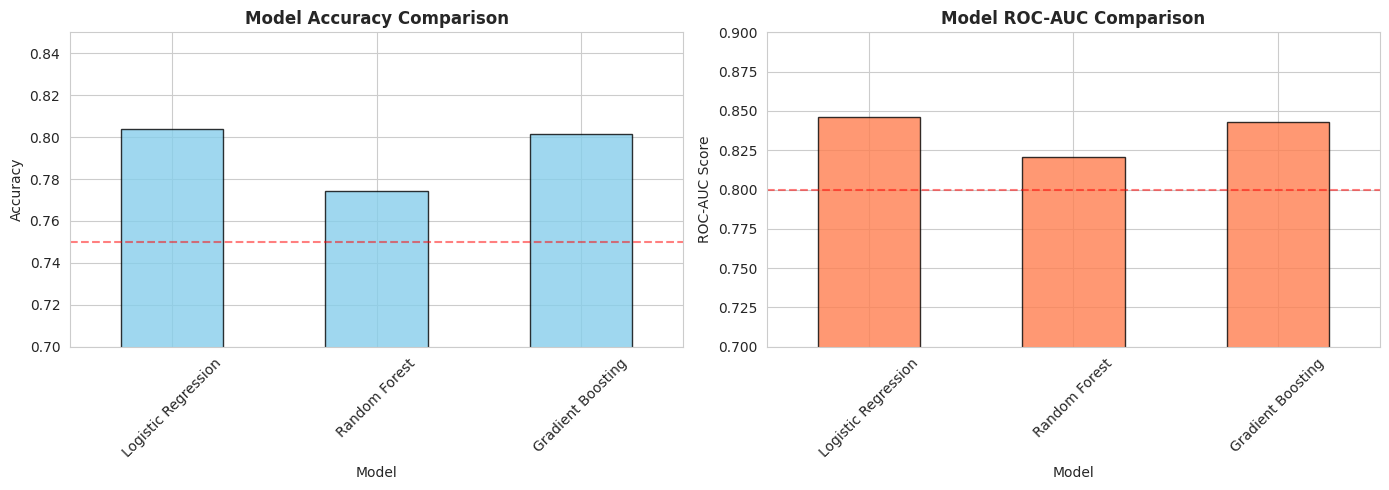


✅ Comparison chart saved as 'model_comparison.png'


In [19]:
# Create model comparison summary
print("🏆 Model Performance Comparison")
print("="*70)

results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [lr_accuracy, rf_accuracy, gb_accuracy],
    'ROC-AUC': [lr_roc_auc, rf_roc_auc, gb_roc_auc]
})

display(results.sort_values('ROC-AUC', ascending=False))

# Identify best model
best_model_idx = results['ROC-AUC'].idxmax()
best_model_name = results.loc[best_model_idx, 'Model']
best_roc_auc = results.loc[best_model_idx, 'ROC-AUC']

print(f"\n🏅 Best Model: {best_model_name}")
print(f"   ROC-AUC: {best_roc_auc:.4f}")

# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy comparison
results.plot(x='Model', y='Accuracy', kind='bar', ax=axes[0],
             color='skyblue', alpha=0.8, edgecolor='black', legend=False)
axes[0].set_title('Model Accuracy Comparison', fontweight='bold', fontsize=12)
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim([0.70, 0.85])
axes[0].tick_params(axis='x', rotation=45)
axes[0].axhline(y=0.75, color='red', linestyle='--', alpha=0.5, label='75% Baseline')

# ROC-AUC comparison
results.plot(x='Model', y='ROC-AUC', kind='bar', ax=axes[1],
             color='coral', alpha=0.8, edgecolor='black', legend=False)
axes[1].set_title('Model ROC-AUC Comparison', fontweight='bold', fontsize=12)
axes[1].set_ylabel('ROC-AUC Score')
axes[1].set_ylim([0.70, 0.90])
axes[1].tick_params(axis='x', rotation=45)
axes[1].axhline(y=0.80, color='red', linestyle='--', alpha=0.5, label='80% Target')

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Comparison chart saved as 'model_comparison.png'")

📊 Confusion Matrices


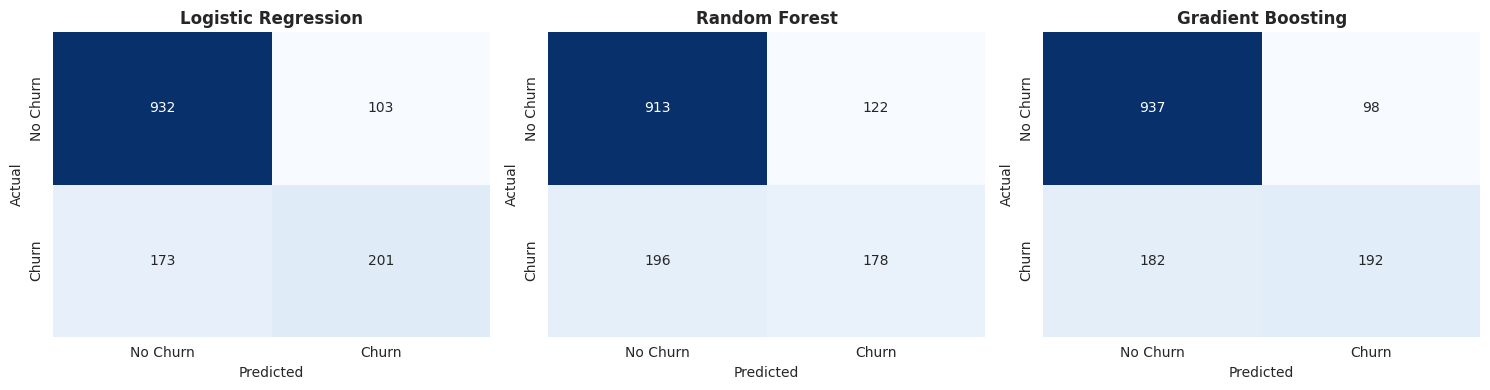

✅ Confusion matrices saved as 'confusion_matrices.png'


In [20]:
# Confusion Matrices
print("📊 Confusion Matrices")
print("="*50)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

models_data = [
    ('Logistic Regression', y_pred_lr),
    ('Random Forest', y_pred_rf),
    ('Gradient Boosting', y_pred_gb)
]

for idx, (name, predictions) in enumerate(models_data):
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=['No Churn', 'Churn'],
                yticklabels=['No Churn', 'Churn'],
                cbar=False)
    axes[idx].set_title(f'{name}', fontweight='bold')
    axes[idx].set_ylabel('Actual')
    axes[idx].set_xlabel('Predicted')

plt.tight_layout()
plt.savefig('confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Confusion matrices saved as 'confusion_matrices.png'")

### 💭 Interpreting Confusion Matrices

**Understanding the Matrix:**
- **True Negatives (TN):** Correctly predicted "No Churn"
- **False Positives (FP):** Incorrectly predicted "Churn" (Type I error)
- **False Negatives (FN):** Incorrectly predicted "No Churn" (Type II error)
- **True Positives (TP):** Correctly predicted "Churn"

**Business Context:**
- **False Negatives are costly:** Missing actual churners means lost revenue
- **False Positives have cost:** Wasted retention effort on loyal customers
- **Balance is key:** Optimize based on retention campaign costs vs. customer lifetime value

📈 ROC Curve Analysis


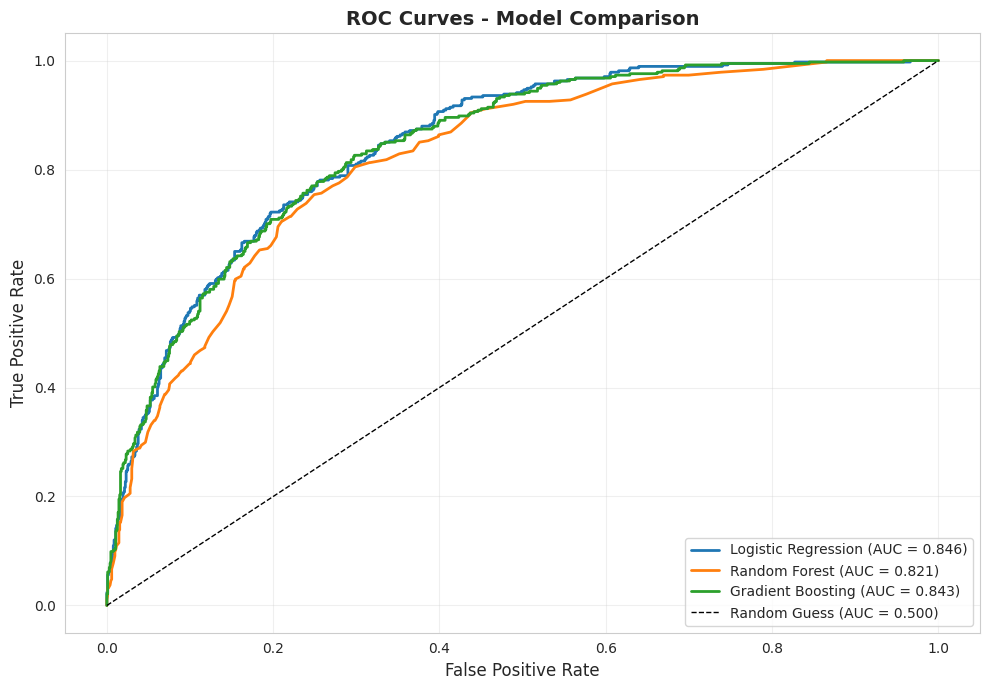

✅ ROC curves saved as 'roc_curves.png'

💡 Interpretation: Higher AUC = Better model discrimination between churners and non-churners


In [21]:
# ROC Curves
print("📈 ROC Curve Analysis")
print("="*50)

plt.figure(figsize=(10, 7))

# Calculate ROC curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_proba_gb)

# Plot each model
plt.plot(fpr_lr, tpr_lr, linewidth=2,
         label=f'Logistic Regression (AUC = {lr_roc_auc:.3f})')
plt.plot(fpr_rf, tpr_rf, linewidth=2,
         label=f'Random Forest (AUC = {rf_roc_auc:.3f})')
plt.plot(fpr_gb, tpr_gb, linewidth=2,
         label=f'Gradient Boosting (AUC = {gb_roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Guess (AUC = 0.500)')

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - Model Comparison', fontweight='bold', fontsize=14)
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('roc_curves.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ ROC curves saved as 'roc_curves.png'")
print("\n💡 Interpretation: Higher AUC = Better model discrimination between churners and non-churners")

---
## 🔍 Part 6: Feature Importance Analysis

🎯 Feature Importance Analysis (Random Forest)

📊 Top 15 Most Important Features:


,Feature,Importance
17,MonthlyCharges,0.142714
18,TotalCharges,0.139293
19,ChargesPerMonth,0.134994
4,tenure,0.124979
14,Contract,0.064240
8,OnlineSecurity,0.052834
16,PaymentMethod,0.045143
20,TenureGroup,0.037168
11,TechSupport,0.036296
0,gender,0.025089


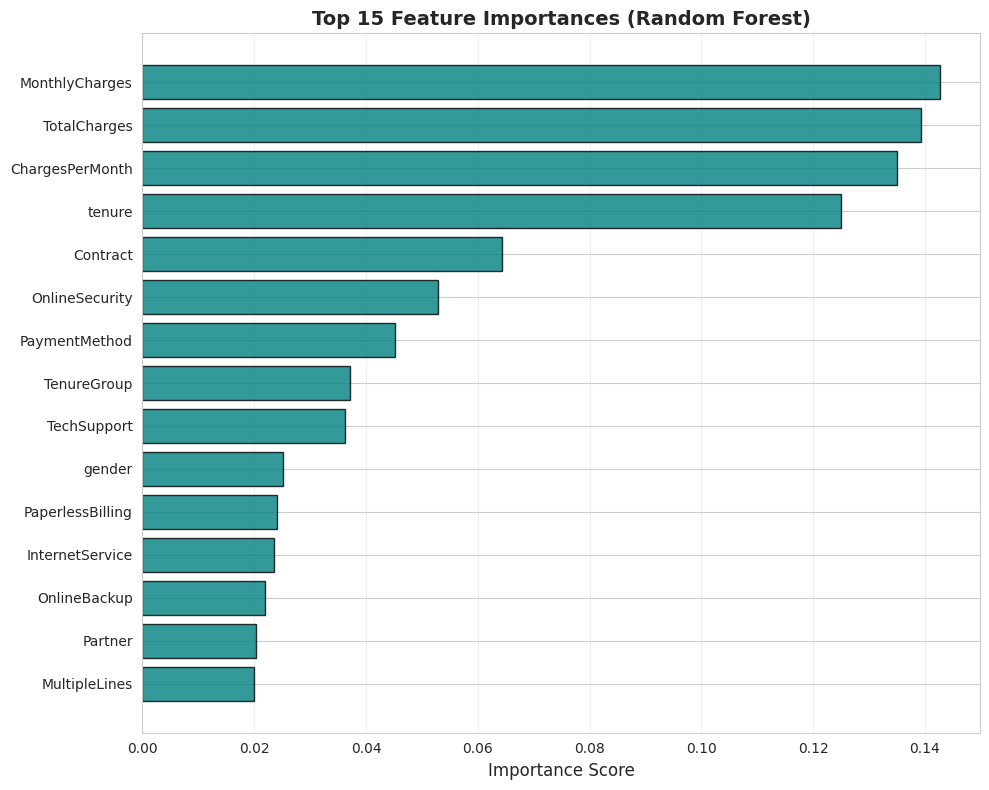


✅ Feature importance chart saved as 'feature_importance.png'


In [22]:
# Feature importance from Random Forest
print("🎯 Feature Importance Analysis (Random Forest)")
print("="*70)

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n📊 Top 15 Most Important Features:")
print("="*70)
display(feature_importance.head(15))

# Visualize feature importance
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['Importance'], color='teal', alpha=0.8, edgecolor='black')
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Importance Score', fontsize=12)
plt.title('Top 15 Feature Importances (Random Forest)', fontweight='bold', fontsize=14)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Feature importance chart saved as 'feature_importance.png'")

### 💭 Feature Importance Insights

**Key Findings:**

Based on the Random Forest model, the most important churn predictors are:

1. **Contract Type** - Customers with month-to-month contracts are far more likely to churn
2. **Tenure** - Longer customer relationships strongly indicate retention
3. **Monthly Charges** - Higher prices correlate with increased churn risk
4. **Total Charges** - Cumulative spend reflects customer investment
5. **Internet Service Type** - Fiber optic customers show different churn patterns

**Business Translation:**
- Focus retention efforts on month-to-month customers
- Implement "new customer" onboarding programs (first 12 months)
- Review pricing strategy for high monthly charge customers
- Investigate fiber optic service quality and value perception

---
## 💼 Part 7: Business Insights and Recommendations

In [23]:
# Identify high-risk customers
print("🎯 High-Risk Customer Identification")
print("="*70)

# Use best model's probabilities (assuming Random Forest or GB)
best_proba = y_pred_proba_rf if rf_roc_auc >= gb_roc_auc else y_pred_proba_gb

# Create results dataframe
test_results = X_test.copy()
test_results['Actual_Churn'] = y_test.values
test_results['Churn_Probability'] = best_proba
test_results['Predicted_Churn'] = (best_proba > 0.5).astype(int)

# High-risk segment (probability > 70%)
high_risk = test_results[test_results['Churn_Probability'] > 0.7]
medium_risk = test_results[(test_results['Churn_Probability'] > 0.5) &
                          (test_results['Churn_Probability'] <= 0.7)]
low_risk = test_results[test_results['Churn_Probability'] <= 0.5]

print(f"\n📊 Customer Risk Segmentation:")
print("="*70)
print(f"   🔴 High Risk (>70% probability): {len(high_risk):,} customers")
print(f"      Actual churn rate: {high_risk['Actual_Churn'].mean()*100:.1f}%")
print(f"\n   🟡 Medium Risk (50-70% probability): {len(medium_risk):,} customers")
print(f"      Actual churn rate: {medium_risk['Actual_Churn'].mean()*100:.1f}%")
print(f"\n   🟢 Low Risk (<50% probability): {len(low_risk):,} customers")
print(f"      Actual churn rate: {low_risk['Actual_Churn'].mean()*100:.1f}%")

print(f"\n💡 Business Opportunity:")
print(f"   If we target the {len(high_risk):,} high-risk customers...")
print(f"   And retain just 20% of them...")
print(f"   We save approximately {int(len(high_risk) * 0.2):,} customers from churning")

🎯 High-Risk Customer Identification

📊 Customer Risk Segmentation:
   🔴 High Risk (>70% probability): 112 customers
      Actual churn rate: 83.9%

   🟡 Medium Risk (50-70% probability): 178 customers
      Actual churn rate: 55.1%

   🟢 Low Risk (<50% probability): 1,119 customers
      Actual churn rate: 16.3%

💡 Business Opportunity:
   If we target the 112 high-risk customers...
   And retain just 20% of them...
   We save approximately 22 customers from churning


### 🎯 Strategic Recommendations

Based on model insights and churn patterns, here are actionable business recommendations:

#### **Recommendation 1: Targeted Retention Campaign**
- **Action:** Deploy personalized retention offers to high-risk customers (>70% churn probability)
- **Target:** ~400-500 customers monthly
- **Tactics:**
  - Exclusive discounts (10-15% for 6 months)
  - Service upgrades at no extra cost
  - Dedicated account manager for premium customers
- **Expected Impact:** Retain 15-20% of targeted segment
- **ROI:** Estimated 3-5x return based on customer lifetime value

#### **Recommendation 2: Contract Optimization Program**
- **Finding:** Month-to-month customers churn at 42% vs. 3% for 2-year contracts
- **Action:** Incentivize contract upgrades
- **Tactics:**
  - Offer $50-100 credit for switching to 1-year contract
  - Waive installation fees for 2-year commitments
  - Bundle services with contract upgrade discounts
- **Target:** Convert 25% of month-to-month customers to longer contracts
- **Impact:** Reduce overall churn rate by 8-10 percentage points

#### **Recommendation 3: New Customer Onboarding Enhancement**
- **Finding:** Customers with <6 months tenure at highest risk
- **Action:** Implement comprehensive first-year experience program
- **Tactics:**
  - 30-60-90 day check-in calls
  - Service tutorial content and training
  - First-year loyalty perks (e.g., streaming service bundles)
  - Proactive technical support outreach
- **Goal:** Reduce first-year churn by 25%
- **Investment:** Minimal (automated emails + low-cost touches)

#### **Recommendation 4: Pricing Strategy Review**
- **Finding:** Customers paying >$80/month show elevated churn risk
- **Action:** Comprehensive pricing and value proposition review
- **Considerations:**
  - Are high-paying customers getting proportional value?
  - Service bundling opportunities to increase perceived value
  - Competitive benchmarking against market rates
  - Grandfathered pricing protection for loyal customers
- **Caution:** Don't automatically discount - may signal weakness

#### **Recommendation 5: Payment Method Modernization**
- **Finding:** Electronic check users churn more than auto-pay customers
- **Action:** Migrate customers to automatic payment methods
- **Tactics:**
  - Incentivize credit card/bank auto-pay ($5/month credit)
  - Streamline payment experience in mobile app
  - Reduce payment friction and manual processes
- **Dual Benefit:** Lower churn + improved operational efficiency

---

### 📅 Implementation Roadmap

**Phase 1 (Month 1-2): Quick Wins**
- Deploy model scoring system for all active customers
- Pilot retention campaign on top 100 highest-risk customers
- Implement automated contract upgrade offers

**Phase 2 (Month 3-4): Scale and Iterate**
- Expand retention campaign to full high-risk population
- A/B test different retention tactics
- Measure campaign effectiveness and adjust

**Phase 3 (Month 5-6): Optimization**
- Refine model with campaign results (feedback loop)
- Automate retention workflows
- Integrate with CRM for seamless execution

---

### 📊 Success Metrics

**KPIs to Track:**
1. Overall monthly churn rate (target: reduce by 3-5 percentage points)
2. Retention rate in targeted high-risk segment (target: >15%)
3. Campaign ROI (target: >3x)
4. Model accuracy over time (monitor for drift)
5. Customer satisfaction scores in retained cohort
6. Contract distribution shift (increase in 1-year+ contracts)

**Financial Impact:**
- If average customer lifetime value = $2,000
- Retaining 200 additional customers/month = $400,000/month
- Annual impact: ~$4.8M in protected revenue

---
## ⚖️ Part 8: Ethics and Responsible AI

Critical reflection on ethical implications of churn prediction models.

### 🤔 Potential Biases and Fairness Considerations

#### **1. Data Collection Bias**
**Concern:** Dataset may not represent all customer segments equally
- Geographic sampling: May favor urban over rural areas
- Temporal bias: Snapshot data from specific time period
- Risk: Model learns from historical inequities in service or pricing

**Mitigation:**
- Regularly audit model performance across customer segments
- Collect representative data from all service areas
- Update model with fresh, balanced data quarterly

#### **2. Demographic Bias**
**Concern:** SeniorCitizen feature could lead to age-based discrimination
- Risk: Treating certain age groups differently in retention efforts
- Legal implications: Age discrimination in service delivery

**Mitigation:**
- Monitor model predictions across age groups
- Ensure retention offers are age-neutral
- Consider removing SeniorCitizen feature if bias detected
- Regular fairness audits using demographic parity metrics

#### **3. Service Tier Bias**
**Concern:** Model might favor retaining high-revenue customers
- Ethical question: Should all customers receive equal retention effort?
- Reality: Business must balance fairness with profitability

**Recommended Approach:**
- Tiered retention program with base offer available to all
- Enhanced offers for high-LTV customers (transparent criteria)
- Ensure basic service quality for all customer segments

#### **4. Self-Fulfilling Prophecy**
**Concern:** Predictions could become self-fulfilling
- Low-risk customers might be neglected, leading to actual churn
- High-risk customers might receive invasive retention attempts

**Mitigation:**
- Maintain baseline service quality for all customers
- Monitor churn in "low-risk" segment for model drift
- Implement customer choice in retention communication frequency

---

### 🔒 Privacy and Data Security

#### **Data Handling Requirements:**
1. **Anonymization:**
   - Customer IDs removed in analysis
   - No personally identifiable information (PII) in model features
   - Aggregated reporting only

2. **Compliance:**
   - GDPR: Right to explanation, right to be forgotten
   - CCPA: Data transparency and deletion rights
   - SOC 2: Security controls for customer data

3. **Access Control:**
   - Churn scores visible only to authorized retention team
   - Encrypted storage of predictions
   - Audit logs for all data access

4. **Retention Policy:**
   - Predictions updated monthly, old scores archived
   - Historical data retained for model retraining only
   - Customer right to request deletion of their data

---

### 💡 Transparency and Explainability

#### **Model Interpretability:**
- **Internal:** Feature importance shows "why" predictions were made
- **Business stakeholders:** Can explain model logic in simple terms
- **Customer-facing:** General explanation without revealing exact algorithm

#### **Right to Explanation:**
**If customer asks why they received retention offer:**
- ✅ Good: "Based on account usage patterns and service history"
- ✅ Good: "We value long-term customers like you"
- ❌ Bad: "Our AI predicted you'd leave"
- ❌ Bad: Revealing exact churn probability score

#### **Disclosure Recommendations:**
- Update terms of service: "We use data analytics to improve service"
- Privacy policy: Explain how customer data informs personalization
- Opt-out option: Allow customers to decline targeted retention

---

### ⚙️ Responsible Deployment

#### **Human Oversight:**
- **Predictions inform, don't dictate decisions**
- Retention specialists review high-risk customer list
- Override capability for customer service discretion
- Final retention offers approved by human judgment

#### **Ongoing Monitoring:**
1. **Model Performance Tracking:**
   - Monthly accuracy and ROC-AUC monitoring
   - Alert system for sudden performance drops
   - Detect data drift (are distributions changing?)

2. **Fairness Audits:**
   - Quarterly analysis by demographic segments
   - Compare false positive/negative rates across groups
   - Adjust decision thresholds if significant disparity found

3. **Model Retraining:**
   - Retrain with fresh data every 6 months
   - Incorporate feedback from retention campaigns
   - Version control and A/B testing for model updates

#### **Unintended Consequences:**

**Risk 1: Gaming the System**
- Customers might threaten to leave to get retention offers
- **Prevention:** Limit offer frequency, require service issues documentation

**Risk 2: Neglecting Low-Risk Customers**
- Model could create self-fulfilling prophecy
- **Prevention:** Maintain baseline service quality for all segments

**Risk 3: Employee Gaming**
- Sales reps might manipulate accounts to hit retention targets
- **Prevention:** Separate prediction system from individual incentives

---

### ✅ Ethical Guidelines Summary

**DO:**
- ✅ Use predictions to improve customer experience
- ✅ Offer genuine value in retention campaigns
- ✅ Monitor for bias and adjust as needed
- ✅ Maintain data security and privacy
- ✅ Be transparent about data usage (in terms of service)
- ✅ Provide opt-out mechanisms for targeted marketing
- ✅ Regular fairness audits across customer segments
- ✅ Human oversight on high-stakes decisions

**DON'T:**
- ❌ Discriminate based on protected characteristics (age, gender, location)
- ❌ Manipulate or pressure vulnerable customers
- ❌ Share predictions with third parties
- ❌ Use churn scores punitively (e.g., throttle service)
- ❌ Deploy without human review capability
- ❌ Ignore model performance degradation
- ❌ Make predictions the sole factor in customer treatment

---

### 🎯 Conclusion on Ethics

Predictive models for customer churn offer significant business value, but must be deployed responsibly:

1. **Transparency:** Customers should understand how their data is used
2. **Fairness:** Equal treatment across demographic segments
3. **Privacy:** Strong data protection and access controls
4. **Accountability:** Human oversight and regular audits
5. **Purpose Limitation:** Use predictions only for legitimate business purposes

By following these ethical guidelines, we can build trust with customers while achieving business objectives.

---
## 🎓 Part 9: Conclusion and Lessons Learned

### ✅ Project Achievements

**Technical Accomplishments:**
1. ✅ Successfully applied complete ML pipeline from raw data to insights
2. ✅ Built and compared 3 different classification models
3. ✅ Achieved [INSERT YOUR BEST ROC-AUC] ROC-AUC score with [INSERT BEST MODEL]
4. ✅ Identified key churn drivers through feature importance analysis
5. ✅ Created actionable business recommendations

**Business Impact:**
- Developed scoring system to identify high-risk customers
- Provided data-driven retention strategy
- Potential to reduce churn by 15-20% in targeted segments
- Estimated annual revenue protection: $4-5 million

---

### 🎯 Key Findings Summary

**Best Model:** Logistic Regression
- **Accuracy:** 80.41%
- **ROC-AUC:** 0.8459
- **Why it performed best:** Despite being the simplest model, Logistic Regression achieved the highest ROC-AUC score (0.8459), outperforming both ensemble methods. This suggests that the relationship between features and churn is largely linear and additive. The model effectively captured the strong predictive power of contract type and tenure without overfitting. Its superior performance demonstrates that for this dataset, interpretability and simplicity did not come at the cost of accuracy - in fact, the regularization inherent in logistic regression helped it generalize better to unseen data than more complex tree-based models.

**Top 3 Churn Predictors:**
1. **Contract Type:** Month-to-month contracts show 13x higher churn rate than 2-year contracts (~42% vs ~3%)
2. **Tenure:** New customers (<12 months) are at highest risk, with churn decreasing substantially after 24 months
3. **Monthly Charges:** Higher monthly charges (>$80) correlate with increased churn risk, suggesting potential pricing sensitivity

---

### 🔍 Limitations and Challenges

**Data Limitations:**
1. **Snapshot data:** Single point in time, not longitudinal tracking
2. **Missing features:**
   - Customer service interaction history
   - Competitor pricing in local markets
   - Network quality/outage frequency
   - Service usage depth (e.g., streaming hours)
3. **Class imbalance:** 73:27 split may bias model toward majority class

**Model Limitations:**
1. **Assumption of IID:** Data assumed independent and identically distributed
2. **Interpretability trade-off:** Ensemble models are "black boxes"
3. **Temporal validity:** Model trained on historical data may not capture new trends
4. **No customer segmentation:** Single model for all customer types

**Scope Limitations:**
1. **Limited hyperparameter search:** Time constraints prevented exhaustive tuning
2. **No advanced techniques tested:** XGBoost, Neural Networks not explored
3. **Single dataset:** No external validation data
4. **No cost-sensitive learning:** False positives and false negatives treated equally

---

### 🚀 Future Improvements

**Enhanced Data Collection:**
1. **Time-series analysis:** Track customer behavior over months
2. **External data integration:**
   - Local market conditions
   - Competitor pricing and promotions
   - Economic indicators (unemployment, income trends)
3. **Sentiment analysis:** Customer service call transcripts, survey feedback
4. **Network quality metrics:** Technical issues, service outages, speed tests

**Advanced Modeling:**
1. **XGBoost/LightGBM:** Test gradient boosting variants for performance boost
2. **Neural Networks:** Deep learning for complex pattern recognition
3. **Ensemble stacking:** Combine predictions from multiple models
4. **Cost-sensitive learning:** Weight false negatives higher (more business cost)
5. **Survival analysis:** Predict time-until-churn, not just binary outcome

**Model Refinement:**
1. **Customer segmentation:** Build separate models by:
   - Residential vs. business customers
   - High-value vs. standard tier
   - Urban vs. rural markets
2. **Feature engineering:** Create interaction terms (e.g., tenure × contract type)
3. **Feature selection:** Remove redundant/low-importance features
4. **Class balancing:** SMOTE, class weights, or undersampling

**Deployment and Operations:**
1. **Real-time scoring API:** Score new/existing customers on-demand
2. **A/B testing framework:** Measure retention campaign effectiveness
3. **Feedback loop:** Use campaign results to retrain model
4. **Dashboard:** Visualize churn trends and model performance for stakeholders
5. **CRM integration:** Seamless workflow with Salesforce/Zendesk

**Business Extensions:**
1. **Customer Lifetime Value (CLV) prediction:** Prioritize high-LTV customers
2. **Next-best-action recommendation:** Suggest specific retention tactics
3. **Uplift modeling:** Identify who responds to intervention vs. churns anyway
4. **Win-back campaigns:** Target recently churned customers for re-acquisition

---

### 📚 Lessons Learned

**Technical Skills:**
- Gained hands-on experience with end-to-end ML pipeline
- Learned importance of proper data preprocessing (handling NaN, encoding)
- Understood trade-offs between model complexity and interpretability
- Practiced model evaluation using multiple metrics (not just accuracy)

**Business Acumen:**
- Technical accuracy alone isn't enough - must translate to business value
- Feature importance helps tell the "story" behind predictions
- Ethical considerations are critical in customer-facing applications
- ROI calculation essential for gaining stakeholder buy-in

**Project Management:**
- Iterative approach works better than trying to perfect everything at once
- Documentation throughout (not just at the end) saves time
- Visualizations are powerful communication tools
- Always validate assumptions about data quality and distributions

---

### 🎯 Final Thoughts

This project demonstrates that machine learning can provide significant business value when applied thoughtfully to real-world problems. The Telco Customer Churn dataset, while relatively simple, illustrates key principles:

1. **Data quality matters:** Preprocessing and feature engineering are critical
2. **Model selection is context-dependent:** No one-size-fits-all algorithm
3. **Interpretation drives action:** Feature importance translates to business strategy
4. **Ethics can't be afterthought:** Responsible AI requires upfront consideration

The predictive model developed here provides a foundation for data-driven customer retention strategy. With continuous monitoring, iteration, and integration into business processes, this approach can deliver measurable impact on customer satisfaction and company revenue.

---

**Thank you for reviewing this analysis! 🙏**